### **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

#### **Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   **NÚMERO DE EQUIPO:**
*     Equipo #83

---        
        
*   **MIEMBROS DEL EQUIPO:**
*     Ernesto Damián Favela Vela: A00738581
*     Gustavo Alejandro Garduño Macedo: A01795341
*     Julia Gabriela Pinedo: A01795315
*     Juan Manuel Rodríguez Mateos: A01794890

---

In [13]:
# Importar Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tabulate import tabulate

In [14]:
# Cargar el DataFrame

# cereals_df = pd.read_csv('../data/Cereals.csv')
cereals_df = pd.read_csv(r'../notebooks/Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [15]:
# *************************** PARTE 0: Clasificación de estadísticas *****************************

# Opcional: Se creará una función para etiquetar las variables de acuerdo con la categoría a la
# que pertenecen, para visualizarlos en una tabla.

def separate_variables_by_type(df):
    """
    Separar las columnas entre numéricas (dtype= int, float) y cualitativas (dtype= object)

    Args:
        df (DataFrame)

    Returns:
        numeric_df (tabla impresa clasificando a las variables numéricas)
        object_df (tabla impresa clasificando a las variables categóricas)
    """
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    object_columns = df.select_dtypes(include=['object']).columns

    # Se declara una lista vacía, la cual se utilizará para almacenar los datos en el dataframe
    # que se generará
    data_types = []

    # Ciclo "for" obtener los data types de cada una de las columnas
    for col in df.columns:
        if col in numeric_columns:
            data_type = "Numeric" # Etiqueta para el tipo "numérico"
        elif col in object_columns:
            data_type = "Object" # Etiqueta para el tipo "objeto"
        data_types.append((col, data_type)) # Guarda las etiquetas de las columnas en la lista

    # Crea un DataFrame para las columnas numéricas
    numeric_df = pd.DataFrame([i for i in data_types if i[1] == "Numeric"],
                                   columns=["Variable", "Categoría"])
    # Crea un DataFrame para las columnas de texto
    object_df = pd.DataFrame([i for i in data_types if i[1] == "Object"],
                                  columns=["Variable", "Categoría"])

    # Imprimir las tablas con los datos
    print('Columnas del tipo "Numeric":')
    print(tabulate(numeric_df, headers="keys", tablefmt="psql", showindex=True))
    print('\n\n')
    print('Columnas del tipo "Object":')
    print(tabulate(object_df, headers="keys", tablefmt="psql", showindex=True))

In [16]:
# Se imprimen las columnas separadas por categoría.

columns_separated = separate_variables_by_type(df=cereals_df)

Columnas del tipo "Numeric":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | calories   | Numeric     |
|  1 | protein    | Numeric     |
|  2 | fat        | Numeric     |
|  3 | sodium     | Numeric     |
|  4 | fiber      | Numeric     |
|  5 | carbo      | Numeric     |
|  6 | sugars     | Numeric     |
|  7 | potass     | Numeric     |
|  8 | vitamins   | Numeric     |
|  9 | shelf      | Numeric     |
| 10 | weight     | Numeric     |
| 11 | cups       | Numeric     |
| 12 | rating     | Numeric     |
+----+------------+-------------+



Columnas del tipo "Object":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | name       | Object      |
|  1 | mfr        | Object      |
|  2 | type       | Object      |
+----+------------+-------------+


In [17]:
# NOTA: A pesar de que la variable "shelf" se clasificó como una variable numérica, esta en
# realidad una variable cualitativa ordinal, debido a que clasifica el estante donde se
# encuentra exhibido el cereal (contando desde el piso). Para efectos de análisis posteriores,
# se convertirá esta variable a categórica. Tomando en cuenta dicha información, se etiquetará
# de acuerdo con el nivel (level 1, level 2, level 3) de cada estante.

# ************************ PARTE 0.1: Transformando la variable "shelf" **************************

# Nombrar las categorías y reemplazarlas en el DF
shelf_categories = {1: 'Shelf_Level_1', 2: 'Shelf_Level_2', 3: 'Shelf_Level_3'}
cereals_df['shelf'] = cereals_df['shelf'].map(shelf_categories)

# Verificar composición del DataFrame después del etiquetado de "shelf"
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,Shelf_Level_3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,Shelf_Level_3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,Shelf_Level_3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,Shelf_Level_3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,Shelf_Level_3,1.0,0.75,34.384843


In [18]:
# ****************************** PARTE 1: Resumen de estadísticas ********************************

# Se clasificarán las columnas según el tipo de variable
columns_separated_after_encoding = separate_variables_by_type(df=cereals_df)

Columnas del tipo "Numeric":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | calories   | Numeric     |
|  1 | protein    | Numeric     |
|  2 | fat        | Numeric     |
|  3 | sodium     | Numeric     |
|  4 | fiber      | Numeric     |
|  5 | carbo      | Numeric     |
|  6 | sugars     | Numeric     |
|  7 | potass     | Numeric     |
|  8 | vitamins   | Numeric     |
|  9 | weight     | Numeric     |
| 10 | cups       | Numeric     |
| 11 | rating     | Numeric     |
+----+------------+-------------+



Columnas del tipo "Object":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | name       | Object      |
|  1 | mfr        | Object      |
|  2 | type       | Object      |
|  3 | shelf      | Object      |
+----+------------+-------------+


In [19]:
"""Estadísticas descriptivas para las variables numéricas del DataFrame"""

# Se declara la función ".describe()" para obtener los datos estadísticos de las columnas que
# se clasificaron como "numéricas".

numeric_columns = cereals_df.select_dtypes(include=['int', 'float']).columns

numerical_summary = cereals_df[numeric_columns].describe()
numerical_summary.T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
weight,77.0,1.029610,0.150477,0.500000,1.000000,1.000000,1.000000,1.500000


In [20]:
"""Estadísticas descriptivas para las variables numéricas del DataFrame"""

# Se obtienen los datos estadísticos de las columnas clasificadas como "categóricas".

object_columns = cereals_df.select_dtypes(include=['object']).columns

object_summary = cereals_df[object_columns].describe()
object_summary.T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74
shelf,77,3,Shelf_Level_3,36


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

- Se define una función para imprimir los gráficos de barras y la frecuencia de cada categoría.

In [21]:
def plot_categorical(df, col_name):
    """
    Obtener gráficos de barras para variables categóricas
    
    Args:
        df (DataFrame)
        col_name (str): Nombre de la columna
        
    Returns:
        Gráfico de barras de la variable seleccionada
    """
    res = df[col_name].value_counts().sort_values(ascending = False)
    print(res.head(n = 10))
    res.plot(kind='bar')

- Gráfico de barras para la variable `shelf`:

shelf
Shelf_Level_3    36
Shelf_Level_2    21
Shelf_Level_1    20
Name: count, dtype: int64


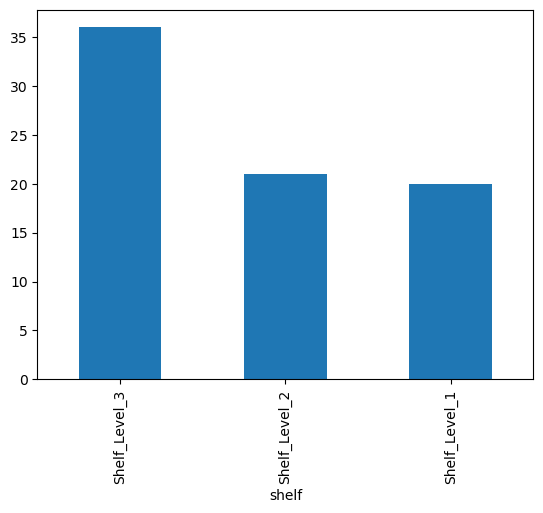

In [22]:
plot_categorical(df=cereals_df, col_name='shelf')

- Gráfico de barras para la variable `mfr`:

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64


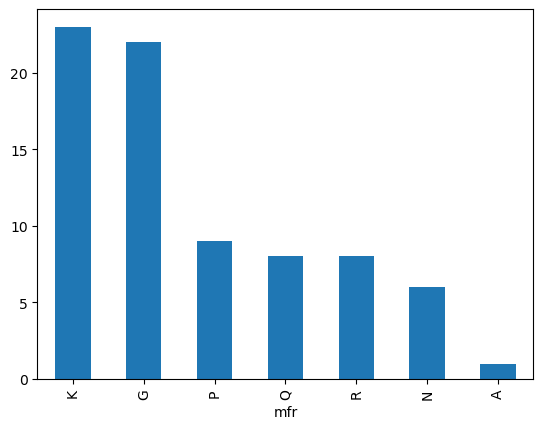

In [23]:
plot_categorical(df=cereals_df, col_name='mfr')

- Para la variable `shelf`, la categoría con mayor prescencia en el conjunto de datos es el estante 3 con 36 observaciones. Seguido del estante 2 con 21 observaciones y el estante 3 con 20 observaciones.
- Respecto a la variable `mfr`, el grupo con mayor número de observaciones es el fabricante K (Kellogs) con 23 observaciones, seguido de G (General Mills) con 22. El resto de los grupos presentan un número menor de observaciones a comparación de los primeros. Esta es una variable mas imbalanceada que `shelf`.

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

- Frecuencia de productos por fabricante en cada estante:

In [24]:
shelf_by_mfr = cereals_df.groupby(['shelf','mfr']).size().unstack()
shelf_by_mfr

mfr,A,G,K,N,P,Q,R
shelf,,,,,,,
Shelf_Level_1,NaN,6.0,4.0,3.0,2.0,1.0,4.0
Shelf_Level_2,1.0,7.0,7.0,2.0,1.0,3.0,NaN
Shelf_Level_3,NaN,9.0,12.0,1.0,6.0,4.0,4.0


- Gráfico de barras generado a partir de dicha información:

<Axes: xlabel='shelf'>

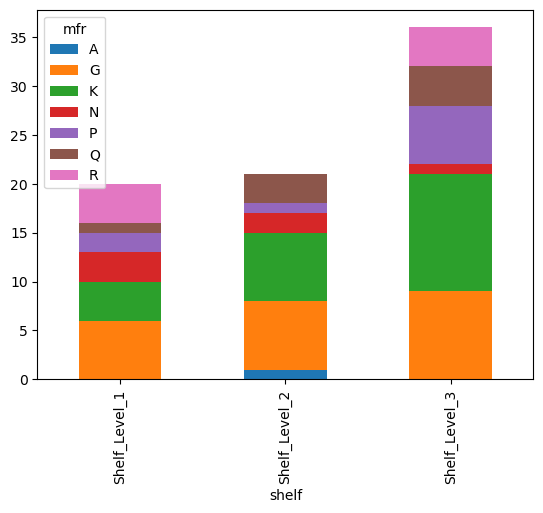

In [25]:
shelf_by_mfr.plot(kind='bar',stacked=True)

- En todos los estantes predominan los fabricantes Kellogs y General Mills en mayor porcentaje. Aparentemente el estante mejor diribuido es el estante uno. En la siguiente gráfica se logra observar dicho comportamiento a detalle:

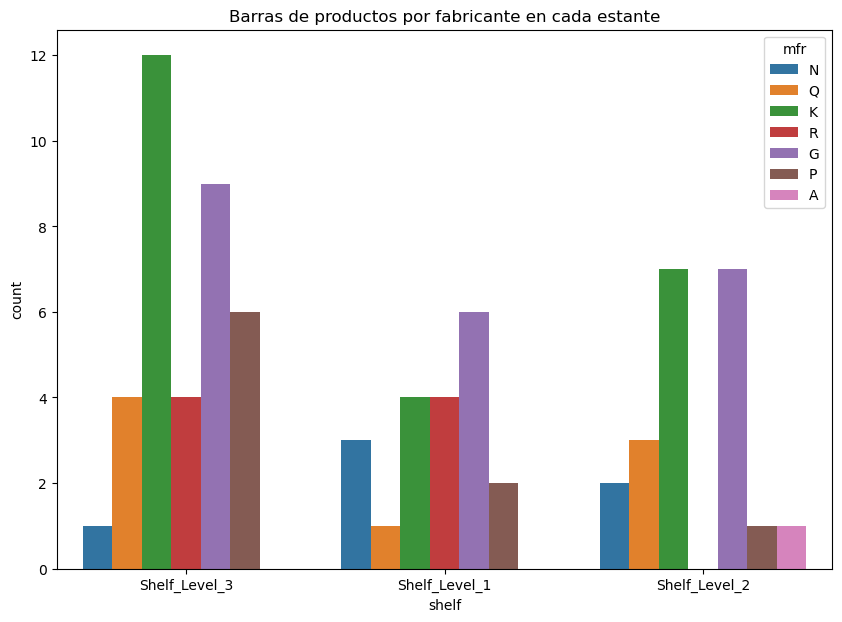

In [26]:
# Se utiliza el parámetro "hue" para obtener el gráfico de barras de shelf vs mfr

plt.figure(figsize=(10,7)) # Tamaño de la figura
sns.countplot(x=cereals_df['shelf'], hue='mfr', data=cereals_df) # Columna seleccionada
plt.title(f'Barras de productos por fabricante en cada estante')
plt.show() # Mostrar la gráfica final

Por lo tanto:

- American Home Food Products
    - Estante 1: 0 productos
    - Estante 2: 1 productos
    - Estante 3: 0 productos
- General Mills
    - Estante 1: 6 productos
    - Estante 2: 7 productos
    - Estante 3: 9 productos
- Kelloggs
    - Estante 1: 4 productos
    - Estante 2: 7 productos
    - Estante 3: 12 productos
- Nabisco
    - Estante 1: 3 productos
    - Estante 2: 2 productos
    - Estante 3: 1 productos
- Post
    - Estante 1: 2 productos
    - Estante 2: 1 productos
    - Estante 3: 6 productos
- Quaker Oats
    - Estante 1: 1 productos
    - Estante 2: 3 productos
    - Estante 3: 4 productos
- Ralston Purina
    - Estante 1: 4 productos
    - Estante 2: 0 productos
    - Estante 3: 4 productos

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

<Axes: title={'center': 'Histograma de ratings'}, ylabel='Frequency'>

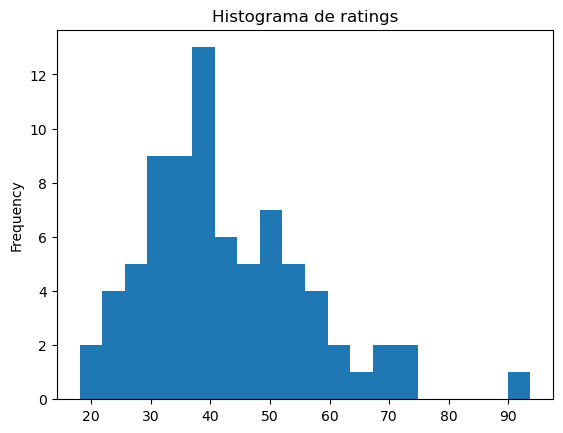

In [27]:
cereals_df['rating'].plot(kind='hist',bins=20,
                          title='Histograma de ratings')

- El rango con más frecuencia de la variable rating se encuentra de 35 a 40.

In [28]:
# Se puede respaldar la afirmación anteriormente presentada mediante un cálculo numérico:

# Separación de bins
bins = [0, 10, 20, 30, 40, 50] 

# Crear intervalos para la variable "rating" de acuerdo con los bins
intervals = pd.cut(cereals_df['rating'], bins)

# Contar la frecuencia de cada intervalo
interval_counts = intervals.value_counts()

# Buscar el rango con mayor frecuencia
most_frequent_interval = interval_counts.idxmax()

print(f'El rango más frecuente de la variable "rating" es: {most_frequent_interval}')
print(f'Con una frecuencia de: {interval_counts[most_frequent_interval]}')

El rango más frecuente de la variable "rating" es: (30, 40]
Con una frecuencia de: 24


3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [29]:
best_rating = cereals_df.sort_values(by='rating',ascending=False)[['name','mfr','rating']].head(n=10)

# Se reinicia el index a la serie resultante
best_rating.reset_index(drop=True, inplace=True)
best_rating

,name,mfr,rating
0,All-Bran_with_Extra_Fiber,K,93.704912
1,Shredded_Wheat_'n'Bran,N,74.472949
2,Shredded_Wheat_spoon_size,N,72.801787
3,100%_Bran,N,68.402973
4,Shredded_Wheat,N,68.235885
5,Cream_of_Wheat_(Quick),N,64.533816
6,Puffed_Wheat,Q,63.005645
7,Puffed_Rice,Q,60.756112
8,Nutri-grain_Wheat,K,59.642837
9,All-Bran,K,59.425505


- El cereal mejor evaluado es "All-Bran con Fibra Extra" de Kelloggs con un rating de 93.7, seguido de "Shredded Wheat & Bran" de Nabisco.

En resumen:
1. "All-Bran with Extra Fiber" de Kelloggs
2. "Shredded Wheat'n'Bran" de Nabisco
3. "Shredded Wheat spoon size" de Nabisco
4. "100% Bran" de Nabisco
5. "Shredded Wheat" de Nabisco
6. "Cream of Wheat (Quick)" de Nabisco
7. "Puffed Wheat" de Quaker Oats
8. "Puffed Rice" de Quaker Oats
9. "Nutri-grain Wheat" de Kelloggs
10. "All-Bran" de Kelloggs

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

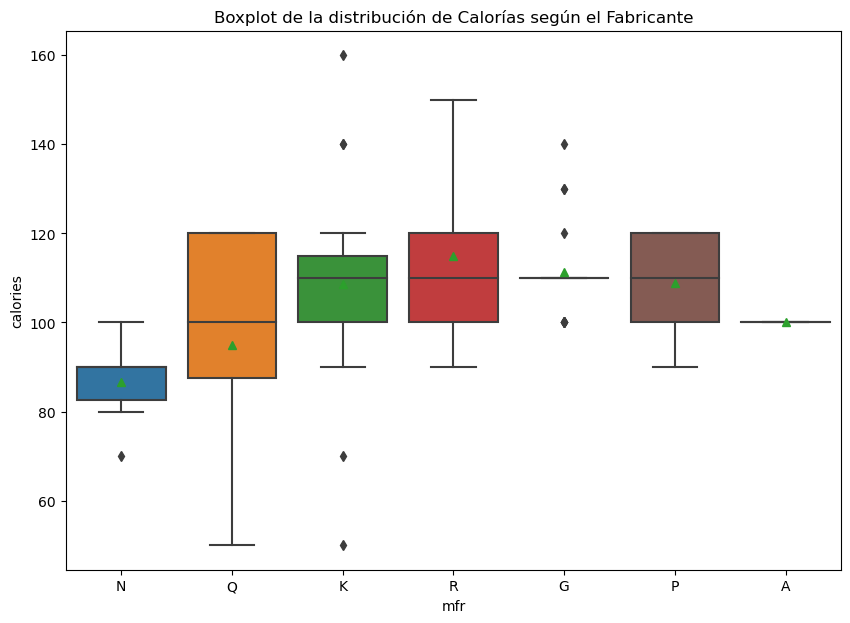

In [30]:
plt.figure(figsize=(10,7)) # Tamaño de la figura
sns.boxplot(x = 'mfr', y = 'calories', data = cereals_df, showmeans=True) # Columna seleccionada
plt.title('Boxplot de la distribución de Calorías según el Fabricante')
plt.xlabel('mfr') # Eje "x"
plt.ylabel('calories') # Eje "y"
plt.show() # Mostrar la gráfica final

- Los fabricantes con una mediana de calorías más baja son Nabisco seguido de Quaker Oats y American Home Food Products. El resto de marcas parece que comparten un valor de la mediana similar.

- Para el fabricante "A", se observa que su valor máximo y mínimo podrían ser iguales. Al igual que: Q1 = Q2 = Q3 = media; lo que podría indicar una desviación estándar de 0, es decir, los datos tienen poca/nula variabilidad y dispersión. Se podría indicar lo mismo para el fabricante "G", sin embargo, se observa que el promedio no se encuentra totalmente entre la línea, por lo que estos datos sí tienen una desviación estándar. Además, los valores máximos y mínimos se toman como valores atípicos con respecto a la mediana de 110.

- Para el fabricante "K" se confirma la afirmación anteriormente dicha, debido a que su mediana es de 110, al igual que los fabricantes "P", "Q" y "R", respectivamente. Sin embargo, el fabricante "K" posee los valores atípicos más dispersos, obteniendo un valor máximo de 160 y un valor mínimo de 50. 

- El valor máximo para el fabricante "P" se encuentra dentro del Q3, al igual que para el fabricante "Q". Sin embargo, el fabricante "P" mantiene un valor mínimo de 90, mientras que para el fabricante "Q" el valor mínimo es 50.

In [31]:
# Se puede respaldar la afirmación anteriormente presentada mediante un cálculo numérico:

# Se obtiene un "describe" de las calorías agrupadas por fabricante.

manufacturer_stats = cereals_df.groupby('mfr')['calories'].describe()
manufacturer_stats

,count,mean,std,min,25%,50%,75%,max
mfr,,,,,,,,
A,1.0,100.000000,NaN,100.0,100.0,100.0,100.0,100.0
G,22.0,111.363636,10.371873,100.0,110.0,110.0,110.0,140.0
K,23.0,108.695652,22.218818,50.0,100.0,110.0,115.0,160.0
N,6.0,86.666667,10.327956,70.0,82.5,90.0,90.0,100.0
P,9.0,108.888889,10.540926,90.0,100.0,110.0,120.0,120.0
Q,8.0,95.000000,29.277002,50.0,87.5,100.0,120.0,120.0
R,8.0,115.000000,22.677868,90.0,100.0,110.0,120.0,150.0


4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

- Matriz de correlación entre las variables numéricas:

In [33]:
correlation_matrix = round(cereals_df.corr(), 2)
correlation_matrix

ValueError: could not convert string to float: '100%_Bran'

- Mapa de calor de las variables numéricas:

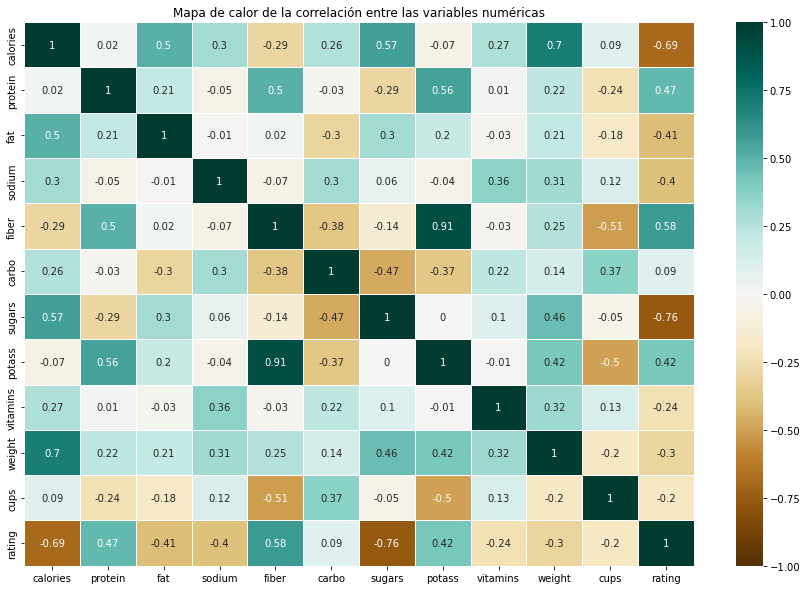

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, linewidths=0.5, cmap='BrBG')
plt.title('Mapa de calor de la correlación entre las variables numéricas')
plt.show()

- Las (5) variables que tienen mayor correlación con rating son:
  - Sugars: -0.76
  - Calories: -0.69
  - Fiber: 0.58
  - Protein: 0.47
  - Potass: 0.42

In [ ]:
# Se puede confirmar la conclusión anterior mediante un cálculo numérico:

# Se elimina la columna "rating" de la matriz de correlación
rating_correlations = correlation_matrix['rating'].drop('rating')

# Con 'abs' se toma el valor absoluto, mientras que 'nlargest' retorna las 
# variables con valores máximos en orden descendente
most_correlated_column = rating_correlations.abs().nlargest(11)

# Imprimir: nombre de la variable y correlación (cantidad)
print('Variables ordenadas por mayor correlación con respecto a "rating":')
for column, correlation in most_correlated_column.items():
    print(f'Variable: {column}, Correlación: {correlation}')

Variables ordenadas por mayor correlación con respecto a "rating":
Variable: sugars, Correlación: 0.76
Variable: calories, Correlación: 0.69
Variable: fiber, Correlación: 0.58
Variable: protein, Correlación: 0.47
Variable: potass, Correlación: 0.42
Variable: fat, Correlación: 0.41
Variable: sodium, Correlación: 0.4
Variable: weight, Correlación: 0.3
Variable: vitamins, Correlación: 0.24
Variable: cups, Correlación: 0.2
Variable: carbo, Correlación: 0.09


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [34]:
# ************************** PARTE 0: Porcentaje de Valores Faltantes ****************************

# Opcional: Se creará una función para obtener automáticamente el porcentaje de valores faltantes
# por cada variable del DataFrame.

def find_missing_values_per_column(df):
    """
    Obtener el porcentaje de valores faltantes por columna e imprimirlo en una tabla

    Args:
        df (DataFrame)

    Returns:
        df_missing (tabla impresa con los porcentajes de valores faltantes por columna)
    """
    missing_percentage = df.isna().sum() * 100 / len(df)

    # Guardar en un DataFrame para su impresión en una tabla

    df_missing = pd.DataFrame({
        'Columna': df.columns,
        'Porcentaje Faltantes': missing_percentage.astype(str) + '%'
        # Imprime el valor con el símbolo "%"
    })

    # Imprimir una tabla con los datos
    print(tabulate(df_missing, headers='keys', tablefmt='psql', showindex=False))

In [35]:
# Se imprime la tabla de valores faltantes.

missing_values = find_missing_values_per_column(df=cereals_df)

+-----------+------------------------+
| Columna   | Porcentaje Faltantes   |
|-----------+------------------------|
| name      | 0.0%                   |
| mfr       | 0.0%                   |
| type      | 0.0%                   |
| calories  | 0.0%                   |
| protein   | 0.0%                   |
| fat       | 0.0%                   |
| sodium    | 0.0%                   |
| fiber     | 0.0%                   |
| carbo     | 1.2987012987012987%    |
| sugars    | 1.2987012987012987%    |
| potass    | 2.5974025974025974%    |
| vitamins  | 0.0%                   |
| shelf     | 0.0%                   |
| weight    | 0.0%                   |
| cups      | 0.0%                   |
| rating    | 0.0%                   |
+-----------+------------------------+


In [ ]:
# Se observa que las columnas que tienen un porcentaje de valores faltantes son: carbo, sugars y
# potass. Se guardarán en la lista "columns_with_missing_values" para eliminar los registros que
# contengan valores faltantes en dichas columnas.

# ************************** PARTE 1: Eliminación de Valores Faltantes ***************************

columns_with_missing_values = ['carbo', 'sugars', 'potass']

# Eliminar valores faltantes.
cereals_df = cereals_df.dropna(subset=columns_with_missing_values)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,Shelf_Level_3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,Shelf_Level_3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,Shelf_Level_3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,Shelf_Level_3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,Shelf_Level_1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,Shelf_Level_3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,Shelf_Level_2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,Shelf_Level_1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,Shelf_Level_1,1.0,1.00,51.592193


In [ ]:
# Se reinicia el índice del DataFrame para mantener la continuidad entre las columnas

cereals_df = cereals_df.reset_index(drop=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,Shelf_Level_3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,Shelf_Level_3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,Shelf_Level_3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,Shelf_Level_3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,Shelf_Level_1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,Shelf_Level_3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,Shelf_Level_2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,Shelf_Level_1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,Shelf_Level_1,1.0,1.00,51.592193


In [ ]:
# Se vuelve a imprimir la tabla de valores faltantes para comprobar que la operación
# se realizó correctamente

missing_values_after_drop = find_missing_values_per_column(df=cereals_df)

+-----------+------------------------+
| Columna   | Porcentaje Faltantes   |
|-----------+------------------------|
| name      | 0.0%                   |
| mfr       | 0.0%                   |
| type      | 0.0%                   |
| calories  | 0.0%                   |
| protein   | 0.0%                   |
| fat       | 0.0%                   |
| sodium    | 0.0%                   |
| fiber     | 0.0%                   |
| carbo     | 0.0%                   |
| sugars    | 0.0%                   |
| potass    | 0.0%                   |
| vitamins  | 0.0%                   |
| shelf     | 0.0%                   |
| weight    | 0.0%                   |
| cups      | 0.0%                   |
| rating    | 0.0%                   |
+-----------+------------------------+


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [ ]:
Y = cereals_df['rating']
X = cereals_df[numeric_columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pd.DataFrame(pca.fit_transform(x))

In [ ]:
principal_components.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,5.364740,-2.196732,-0.986145,-1.254493,0.952970,-0.269240,0.006249,0.050121,0.024768,0.265060,0.010946,1.028426e-08
1,-0.049915,-1.690545,-2.901426,3.276503,1.191867,0.636621,-0.406721,-1.239471,-0.594881,0.030007,-0.101016,1.285542e-09
2,4.740507,-2.413269,-0.105128,-1.463840,1.367409,-1.532245,-0.273786,0.011087,0.119851,-0.521732,-0.010720,1.491326e-08
3,7.717178,-1.221734,0.674423,-1.794585,0.764479,-0.070455,-0.820448,-1.008505,0.059635,0.753295,0.069698,-1.963442e-08
4,-0.918148,-0.589213,-1.468964,0.048603,0.673019,-0.519896,0.243493,0.003515,-0.185366,0.187643,-0.056660,1.911098e-08


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

No por que una variable es categorica implica que tambien es predictora, todo depende de la infomracion del conjunto de datos a analizar. En este ejemplo tanto 'shelf' , 'mfr' como 'type'  se pueden utilizar para identificar tendencias en ventas y generar predicciones de ventas

In [52]:
# Importando la libreria
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [49]:
#Codificando shelf utilizando ordinal encoding ya que los estantes estan agrupados segun un orden de abajo (1) hacia arriba (3)
ordinal_encoder = OrdinalEncoder()
shelf_predictor = cereals_df[['shelf']]
shelf_encoded = ordinal_encoder.fit_transform(shelf_predictor)
ordinal_encoder.categories_

[array(['Shelf_Level_1', 'Shelf_Level_2', 'Shelf_Level_3'], dtype=object)]

In [53]:
#Codificando type utilizando one hot encoding ya solo hay dos elementos (y ninguno es mas importante que el otro)
one_hot_encoder = OneHotEncoder()
type_predictor = cereals_df[['type']]
type_encoded = one_hot_encoder.fit_transform(type_predictor)
one_hot_encoder.categories_

[array(['C', 'H'], dtype=object)]

In [56]:
#Codificando mfr utilizando one hot encoding ya que las relaciones entre las columnas no estan claramente identificadas
one_hot_encoder = OneHotEncoder()
mfr_predictor = cereals_df[['mfr']]
mfr_encoded = one_hot_encoder.fit_transform(mfr_predictor)
one_hot_encoder.categories_

[array(['A', 'G', 'K', 'N', 'P', 'Q', 'R'], dtype=object)]

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.